In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.cluster import KMeans

%matplotlib inline

## `eigsort.m`

In [2]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [3]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

## `spectclust.m`

In [28]:
# refs
# [1]	Shi, J., and J. Malik (1997) "Normalized Cuts and Image Segmentation",
# 	in Proc. of IEEE Conf. on Comp. Vision and Pattern Recognition, 
# 	Puerto Rico.

# [2]	Kannan, R., S. Vempala, and A. Vetta (2000) "On Clusterings - Good, Bad %%	and Spectral", Tech. Report, CS Dept., Yale University.

# This code is from ref [3] 
# [3]	Ng, A. Y., M. I. Jordan, and Y. Weiss (2001) "On Spectral Clustering:
#  	Analysis and an algorithm", in Advances in Neural Information Processing%%	Systems 14.


# [4]	Weiss, Y. (1999) "Segmentation using eigenvectors: a unifying view", 
# 	Tech. Rep., CS. Dept., UC Berkeley.

In [38]:
# For question 9 uncomment this code to make your own random data of the same form
r1 = 5
r2 = 10
set1 = np.random.uniform(low=0,high=2*np.pi,size=(1,20))
set2 = np.random.uniform(low=0,high=2*np.pi,size=(1,30))
d1 = np.vstack((r1*np.cos(set1),r1*np.sin(set1)))
d2 = np.vstack((r2*np.cos(set2),r2*np.sin(set2)))

In [39]:
# For question 9 comment out the next 3 lines
#allpts = sio.loadmat('HW3.mat')['allpts']
#d1 = allpts[0:20].T
#d2 = allpts[20:50].T

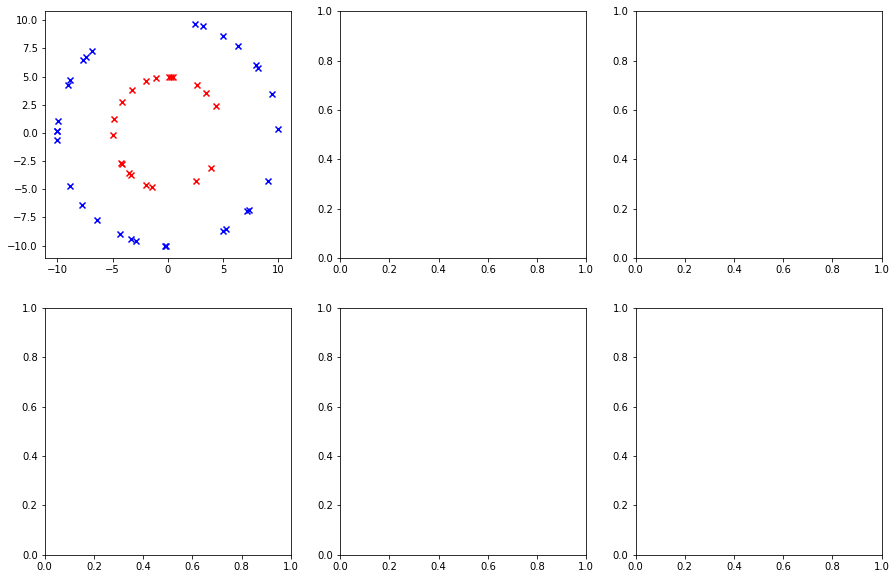

In [40]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

ax = axes[0,0]
ax.scatter(d1[0,:], d1[1,:], c='r', marker='x')
ax.scatter(d2[0,:], d2[1,:], c='b', marker='x')

cluster1 = d1.T
cluster2 = d2.T

allpts = np.vstack((cluster1, cluster2))
goto = np.shape(allpts)[0]

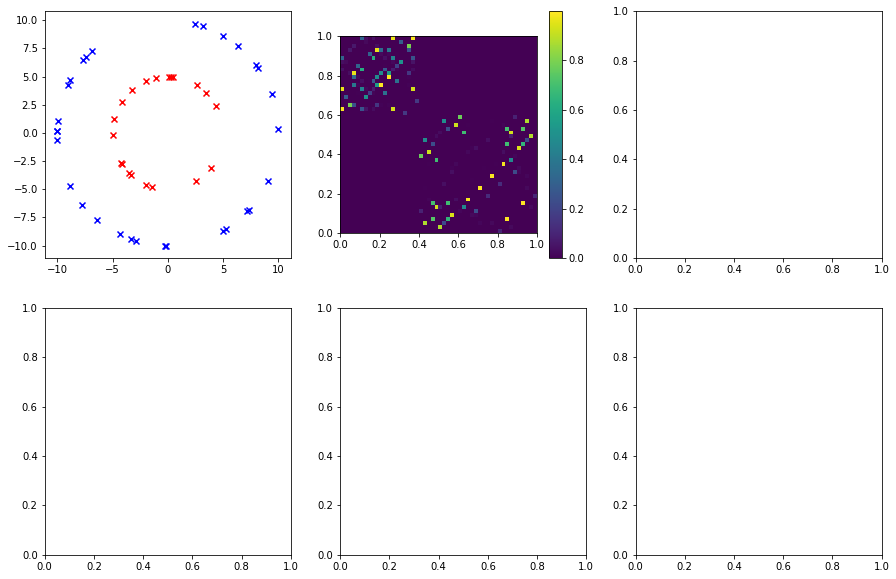

In [41]:
# compute A (step 1)
# experiment with sigsq in question 8
sigsq = 0.9
Aisq = np.power(allpts[:,0], 2) + np.power(allpts[:,1], 2)
Dotprod = allpts.dot(allpts.T)

distmat = - repmat(Aisq, goto, 1) - repmat(Aisq.reshape(-1,1), 1, goto)  + 2*Dotprod
Afast = np.exp(distmat / (2*sigsq))
A = Afast - np.diag(np.diag(Afast))

ax = axes[0,1]
im = ax.imshow(A, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

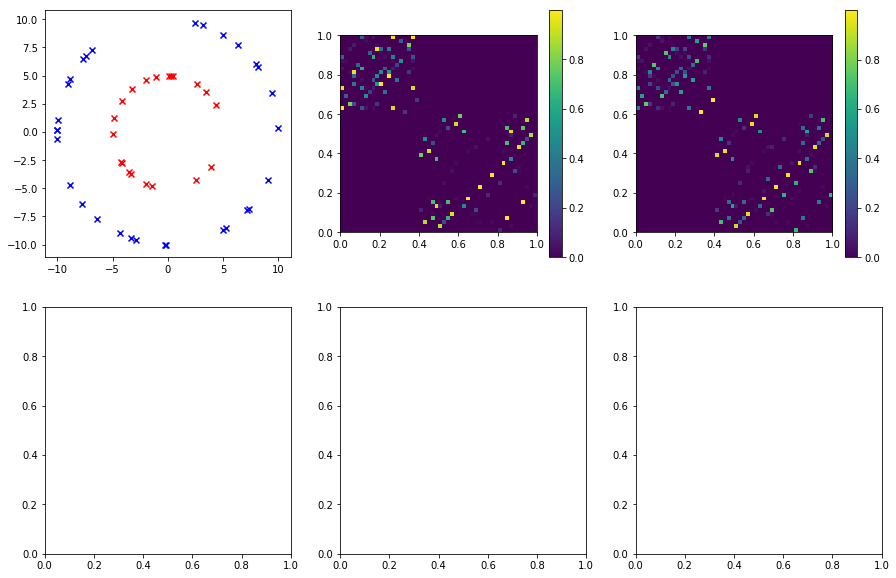

In [42]:
# step 2
D = np.diag(np.sum(A.T, axis=0))
L = np.linalg.inv(np.sqrt(D)).dot(A).dot(np.linalg.inv(np.sqrt(D)))
ax = axes[0,2]
im = ax.imshow(L, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

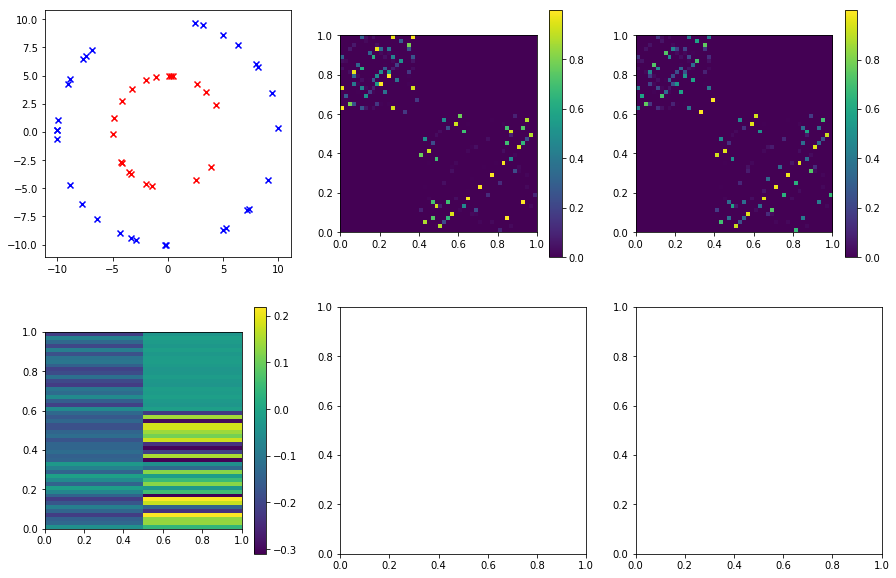

In [43]:
# step 3 
di, X = np.linalg.eig(L)
Xsort, Dsort = eigsort(X,di)
Xuse = Xsort[:, :2]
ax = axes[1,0]
im = ax.imshow(Xuse, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

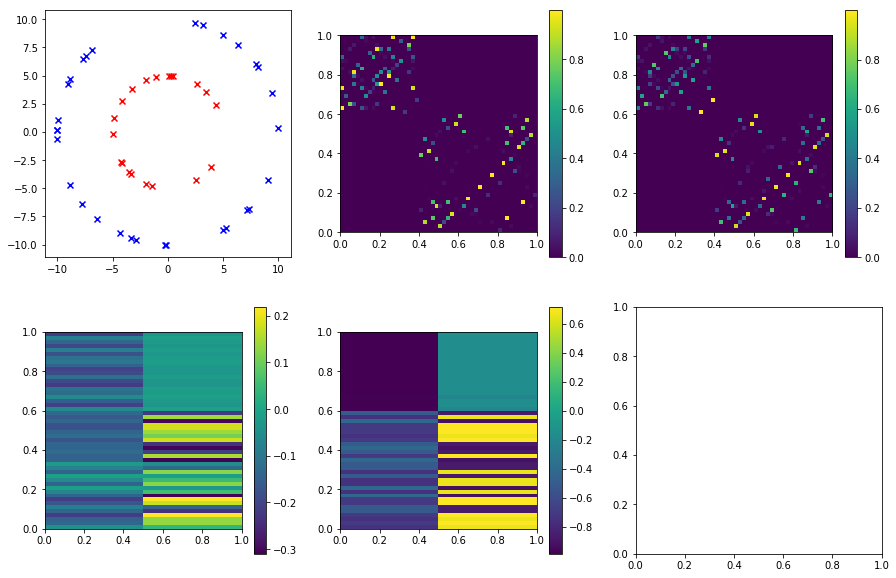

In [44]:
# normalize X to get Y (step 4)
Xsq = np.multiply(Xuse, Xuse)
divmat = repmat(np.sqrt(np.sum(Xsq.T, axis=0)).reshape(-1,1), 1, 2)
Y = np.divide(Xuse, divmat)
ax = axes[1,1]
im = ax.imshow(Y, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

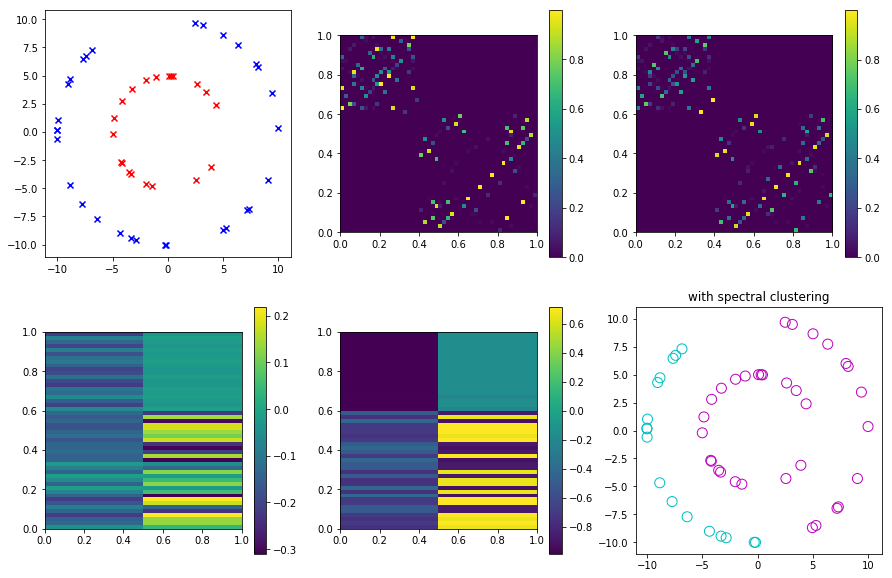

In [45]:
# step 5/6
kmeans = KMeans(n_clusters=2).fit(Y)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[1,2]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with spectral clustering')
fig

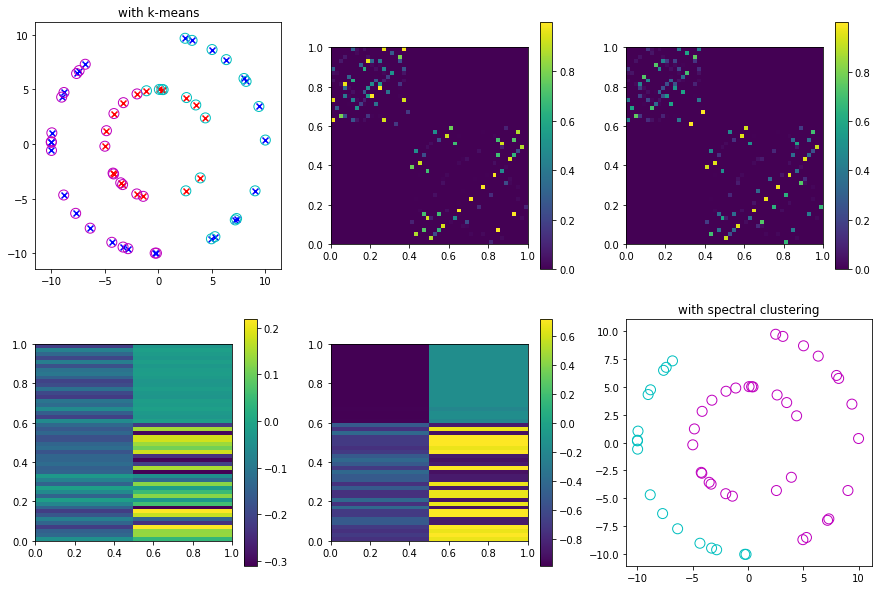

In [46]:
# For comparison run kmeans on original data
kmeans = KMeans(n_clusters=2).fit(allpts)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[0, 0]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with k-means')
fig

In [15]:
fig.savefig('pic')

### Q7

The first plot shows the attempt to perform classification using k-means. However, it fails to show a clear classification as the first plot has mixed points in the outer and inner rings. The second plot shows the affinity matrix of data points with the zero diagonal entries. The third plot shows the normalized Laplacian matrix. The fourth plot shows the sorted eigenvectors of matrix L. The fifth plot shows the result of normalization with rows of X. Then, the last plot shows the successfully classified data points into an outer and inner rings after spectral clustering.

### Q8

sigsq represents the distance among data points within the same cluster. This means that it also represents the level of similarity among data points. If sigsq is too small, the affinity among points also becomes too small, close to 0, and that the data points do not have to be really similar to be in the same cluster. On the other hand, if sigsq is too large, affinity among points becomes too large, close to 1, and data points have to be almost the same to be in the same cluster. A sigsq value that is either too small or too large cannot produce desired clustering result.

### Q9

There is not a sigsq value that produces desired clustering result for random data. The spectral clustering seems to choose the large gap between outer and inner rings as the split, and thus produce results that have mixed points for both outer and inner rings. We can see that spectral clustering only works for certain data sets and sigsq values.